In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import sklearn

#Simpe Liner regression 

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [4]:
df.shape

(7278, 6)

In [7]:
df = df[df['district']=='Чиланзарский']

In [9]:
df.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [12]:
sizemean=df['size'].mean()

In [13]:
pricemean = df['price'].mean()

In [15]:
price = df['price'].to_numpy()

In [16]:
size = df['size'].to_numpy()

In [17]:
theat1 = sum((size-sizemean)*(price-pricemean))/sum((size-sizemean)**2)

In [18]:
theat1

740.0264822713287

In [22]:
theat0 = pricemean-sizemean*theat1

In [23]:
theat0

-195.94911352690542

In [39]:
df1 = df.sample(10)

In [62]:
x_test = df1['size'].to_numpy()

In [63]:
y_predict = theat0+theat1*x_test

In [43]:
y

array([80466.93745405, 60486.22243272, 37545.40148231, 46425.71926957,
       47905.77223411, 72326.64614906, 41245.53389367, 26445.00424824,
       34585.29555323, 26445.00424824])

In [60]:
y_test= df1['price'].to_numpy()


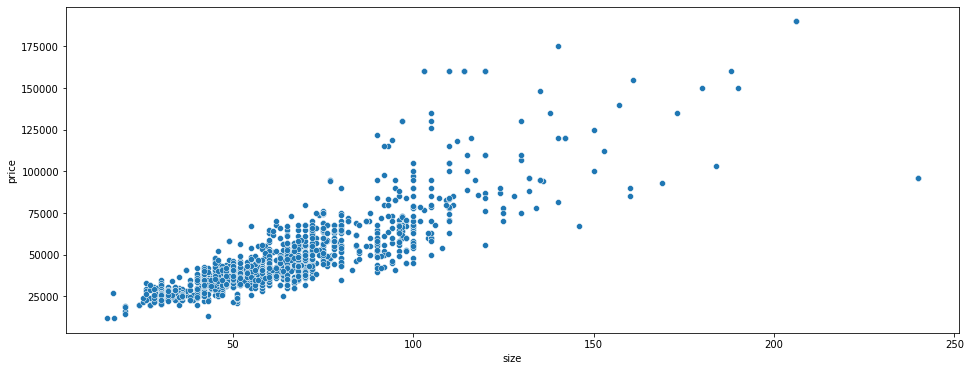

In [47]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x='size', y='price')
plt.show()

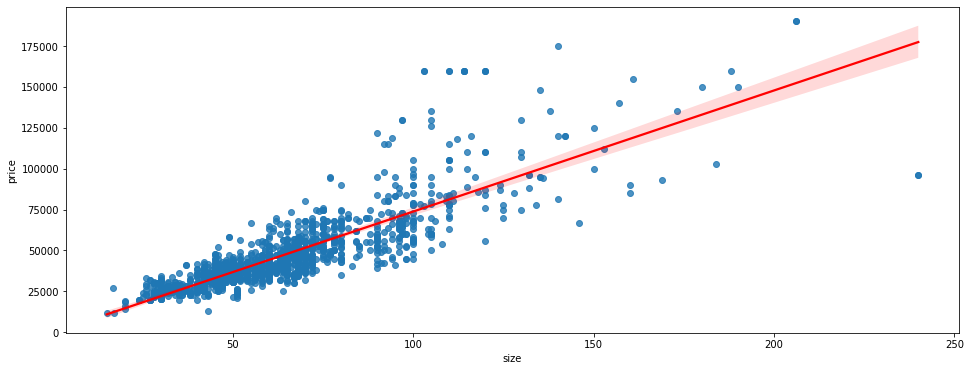

In [49]:
plt.figure(figsize=(16,6))
sns.regplot(data=df, x='size', y='price', line_kws={'color':'red'})
plt.show()

#test

In [64]:
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)

In [65]:
MAE

6540.906462402161

In [67]:
sum(np.absolute(y_predict-y_test))/len(y_test) # bu bizga test qilish uchun 

6540.906462402161

In [68]:
np.sqrt(sum((y_predict-y_test)**2)/len(y_test)) # bu bizga test qilish uchun 

10045.244428226953

#Sklearning dan foydalanib linear regreshinni hisoblaymiz 

In [70]:
from sklearn.model_selection import train_test_split
trean_set , test_set = train_test_split(df, test_size=0.1, random_state=40)

In [72]:
trean_set.head()

,district,rooms,size,level,max_levels,price
783,Чиланзарский,2,60.0,3,5,39000.0
5717,Чиланзарский,2,51.0,1,4,33000.0
6843,Чиланзарский,1,34.0,2,4,29000.0
2830,Чиланзарский,4,115.0,5,6,89000.0
5521,Чиланзарский,1,43.0,1,5,26500.0


In [82]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_trean = np.asanyarray(trean_set[['size']])
y_trean = np.asanyarray(trean_set[['price']])

LR_model.fit(x_trean,y_trean)
theat1 = LR_model.coef_[0][0]
theat0 = LR_model.intercept_[0]

In [83]:
theat1

732.0320873050489

In [84]:
theat0

167.42136913257127

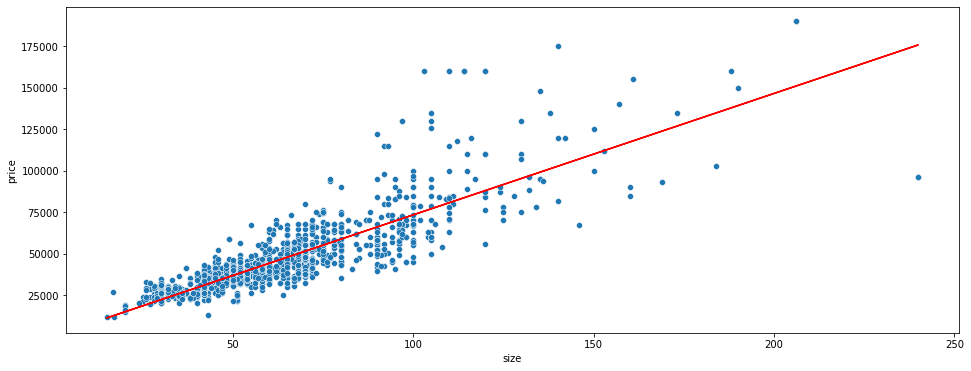

In [90]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=trean_set, x='size', y= 'price')
plt.plot(x_trean,theat0+theat1*x_trean, '-r' )
plt.show()


In [93]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [95]:
Y_pridict = LR_model.predict(x_test)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(Y_pridict, y_test)
RMSE = np.sqrt(mean_squared_error(Y_pridict, y_test))

In [99]:
MAE

7167.444259028258

In [102]:
RMSE 

12603.07074728965